<h1>Import the libraries</h1>

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import KNNImputer

<h1>Read the csv file</h1>

In [12]:
df = pd.read_csv('data_dog.csv')
df.head()

,size_dog,eye_circularity,skull_circularity,ear_size,eyes_distance,ear_form,hair_tone,nose_elongatedness,weight_dog,muzzle_form,skin_tone_main,skin_pattern_complexity,body_length,tail_length,hair_curlness,hair_length,leg_front_number,leg_back_number,breuni_class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,fashion_lifestyle_elite
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,fashion_lifestyle_elite
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,main_stream
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,fashion_lifestyle_elite
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,trendy


<h1>Missing Values</h1>

In [13]:
df.isna().sum()

size_dog                   0
eye_circularity            5
skull_circularity          4
ear_size                   6
eyes_distance              2
ear_form                   0
hair_tone                  1
nose_elongatedness         1
weight_dog                 3
muzzle_form                0
skin_tone_main             3
skin_pattern_complexity    2
body_length                2
tail_length                4
hair_curlness              6
hair_length                1
leg_front_number           1
leg_back_number            0
breuni_class               0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   size_dog                 846 non-null    int64  
 1   eye_circularity          841 non-null    float64
 2   skull_circularity        842 non-null    float64
 3   ear_size                 840 non-null    float64
 4   eyes_distance            844 non-null    float64
 5   ear_form                 846 non-null    int64  
 6   hair_tone                845 non-null    float64
 7   nose_elongatedness       845 non-null    float64
 8   weight_dog               843 non-null    float64
 9   muzzle_form              846 non-null    int64  
 10  skin_tone_main           843 non-null    float64
 11  skin_pattern_complexity  844 non-null    float64
 12  body_length              844 non-null    float64
 13  tail_length              842 non-null    float64
 14  hair_curlness            8

In [15]:
len(df[df.isna().any(axis=1)])

33

<h1>Deleting missing values?</h1>
rows with missing vallues = 33/846 = 3.9%

In [16]:
dogStr_df = df[['breuni_class']]
dogStr_df.head()

,breuni_class
0,fashion_lifestyle_elite
1,fashion_lifestyle_elite
2,main_stream
3,fashion_lifestyle_elite
4,trendy


In [17]:
dogNoStr_df = df.drop(columns='breuni_class')

<h1>Fill values with Neughbors</h1> 

In [18]:
knnimp = KNNImputer()
dogNoString_imp = pd.DataFrame(knnimp.fit_transform(dogNoStr_df),columns= dogNoStr_df.columns)

In [19]:
dogNoString_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   size_dog                 846 non-null    float64
 1   eye_circularity          846 non-null    float64
 2   skull_circularity        846 non-null    float64
 3   ear_size                 846 non-null    float64
 4   eyes_distance            846 non-null    float64
 5   ear_form                 846 non-null    float64
 6   hair_tone                846 non-null    float64
 7   nose_elongatedness       846 non-null    float64
 8   weight_dog               846 non-null    float64
 9   muzzle_form              846 non-null    float64
 10  skin_tone_main           846 non-null    float64
 11  skin_pattern_complexity  846 non-null    float64
 12  body_length              846 non-null    float64
 13  tail_length              846 non-null    float64
 14  hair_curlness            8

In [20]:
filledDog_df=dogNoString_imp.join(dogStr_df)
filledDog_df.head()

,size_dog,eye_circularity,skull_circularity,ear_size,eyes_distance,ear_form,hair_tone,nose_elongatedness,weight_dog,muzzle_form,skin_tone_main,skin_pattern_complexity,body_length,tail_length,hair_curlness,hair_length,leg_front_number,leg_back_number,breuni_class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,fashion_lifestyle_elite
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,fashion_lifestyle_elite
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,main_stream
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,fashion_lifestyle_elite
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,trendy


<h1>Descriptive analysis</h1>

In [21]:
filledDog_df.describe().T

,count,mean,std,min,25%,50%,75%,max
size_dog,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
eye_circularity,846.0,44.863593,6.168941,33.0,40.00,44.0,49.0,59.0
skull_circularity,846.0,82.096454,15.773256,40.0,70.00,80.0,98.0,112.0
ear_size,846.0,168.955319,33.457694,104.0,141.00,167.0,195.0,333.0
eyes_distance,846.0,61.691489,7.886364,47.0,57.00,61.0,65.0,138.0
ear_form,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
hair_tone,846.0,168.839480,33.244603,112.0,146.25,157.0,198.0,265.0
nose_elongatedness,846.0,40.934043,7.811565,26.0,33.00,43.0,46.0,61.0
weight_dog,846.0,20.582742,2.592138,17.0,19.00,20.0,23.0,29.0
muzzle_form,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [22]:
filledDog_df.skew()

c:\Users\nwbab\anaconda3\envs\mw241prog\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


size_dog                   0.381271
eye_circularity            0.261665
skull_circularity          0.107945
ear_size                   0.389461
eyes_distance              3.824626
ear_form                   6.778394
hair_tone                  0.605832
nose_elongatedness         0.047754
weight_dog                 0.770684
muzzle_form                0.256359
skin_tone_main             0.651503
skin_pattern_complexity    0.835804
body_length                0.279581
tail_length                2.074270
hair_curlness              0.775617
hair_length                0.689207
leg_front_number           0.246641
leg_back_number           -0.226341
dtype: float64

In [23]:
filledDog_df.cov()

,size_dog,eye_circularity,skull_circularity,ear_size,eyes_distance,ear_form,hair_tone,nose_elongatedness,weight_dog,muzzle_form,skin_tone_main,skin_pattern_complexity,body_length,tail_length,hair_curlness,hair_length,leg_front_number,leg_back_number
size_dog,67.806566,35.187334,102.919332,190.516742,6.038207,5.616954,222.561584,-50.729870,17.362729,80.818554,197.697297,1191.211261,156.818733,-15.580806,9.544765,11.536965,15.118261,22.391727
eye_circularity,35.187334,38.055833,77.708699,128.591531,7.251358,7.022811,176.424469,-39.934451,13.716507,86.481495,156.631730,929.355941,187.930675,2.727142,4.439758,-0.862517,-4.252816,1.759027
skull_circularity,102.919332,77.708699,248.795609,407.526682,19.985059,19.149943,476.175028,-112.489725,36.641241,177.420943,428.741769,2482.110515,362.441930,-27.175770,8.930677,37.246934,14.376995,39.186742
ear_size,190.516742,128.591531,407.526682,1119.417315,175.417915,69.056387,821.780512,-207.227329,61.725477,277.311900,838.138967,4292.980878,587.185862,-45.738735,8.393949,52.246475,78.602886,116.872313
eyes_distance,6.038207,7.251358,19.985059,175.417915,62.194744,23.520574,27.726277,-11.384160,1.627806,14.743067,67.949279,128.083759,31.773035,8.965570,-2.221674,-2.388002,11.618383,15.694738
ear_form,5.616954,7.022811,19.149943,69.056387,23.520574,21.171195,25.509645,-6.471645,1.930513,20.433808,46.161623,117.591196,28.405215,10.142849,0.339479,1.783330,-0.760161,4.925981
hair_tone,222.561584,176.424469,476.175028,821.780512,27.726277,25.509645,1105.203599,-252.781014,85.492942,391.189869,993.790867,5852.953105,866.477956,-7.167199,12.076982,62.588696,1.033231,29.662341
nose_elongatedness,-50.729870,-39.934451,-112.489725,-207.227329,-11.384160,-6.471645,-252.781014,61.020544,-19.246725,-87.941380,-230.207008,-1320.352150,-194.760189,6.136017,-1.990415,-12.922998,-5.447427,-12.594690
weight_dog,17.362729,13.716507,36.641241,61.725477,1.627806,1.930513,85.492942,-19.246725,6.719181,30.601873,76.384906,454.543169,67.335825,-0.320159,1.049093,4.935286,-0.337736,1.899684
muzzle_form,80.818554,86.481495,177.420943,277.311900,14.743067,20.433808,391.189869,-87.941380,30.601873,210.704141,340.650681,2047.136002,409.312083,4.390373,9.634518,0.162840,-9.495944,8.289506


In [24]:
filledDog_df.kurtosis()

c:\Users\nwbab\anaconda3\envs\mw241prog\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


size_dog                   -0.535275
eye_circularity            -0.925593
skull_circularity          -0.979226
ear_size                    0.304890
eyes_distance              29.871662
ear_form                   58.375455
hair_tone                  -0.615892
nose_elongatedness         -0.864079
weight_dog                 -0.393060
muzzle_form                -0.770098
skin_tone_main              0.116190
skin_pattern_complexity    -0.216332
body_length                -0.490441
tail_length                11.404642
hair_curlness               0.102578
hair_length                -0.140945
leg_front_number           -0.591772
leg_back_number            -0.813435
dtype: float64

In [25]:
filledDog_df.corr()

,size_dog,eye_circularity,skull_circularity,ear_size,eyes_distance,ear_form,hair_tone,nose_elongatedness,weight_dog,muzzle_form,skin_tone_main,skin_pattern_complexity,body_length,tail_length,hair_curlness,hair_length,leg_front_number,leg_back_number
size_dog,1.000000,0.692692,0.792391,0.691514,0.092981,0.148249,0.813005,-0.788660,0.813437,0.676143,0.764527,0.818649,0.585141,-0.252888,0.236157,0.156874,0.298243,0.365552
eye_circularity,0.692692,1.000000,0.798615,0.623025,0.149050,0.247416,0.860255,-0.828703,0.857778,0.965775,0.808532,0.852543,0.936020,0.059084,0.146629,-0.015655,-0.111988,0.038332
skull_circularity,0.792391,0.798615,1.000000,0.772216,0.160660,0.263860,0.908080,-0.912964,0.896170,0.774902,0.865570,0.890522,0.706017,-0.230268,0.115355,0.264401,0.148065,0.333976
ear_size,0.691514,0.623025,0.772216,1.000000,0.664815,0.448575,0.738820,-0.792890,0.711722,0.571000,0.797715,0.726119,0.539235,-0.182710,0.051114,0.174846,0.381634,0.469584
eyes_distance,0.092981,0.149050,0.160660,0.664815,1.000000,0.648184,0.105753,-0.184793,0.079628,0.128788,0.274370,0.091910,0.123788,0.151941,-0.057395,-0.033904,0.239317,0.267531
ear_form,0.148249,0.247416,0.263860,0.448575,0.648184,1.000000,0.166767,-0.180055,0.161861,0.305943,0.319475,0.144626,0.189681,0.294619,0.015032,0.043396,-0.026837,0.143919
hair_tone,0.813005,0.860255,0.908080,0.738820,0.105753,0.166767,1.000000,-0.973386,0.992090,0.810644,0.951923,0.996320,0.800819,-0.028814,0.074013,0.210799,0.005049,0.119945
nose_elongatedness,-0.788660,-0.828703,-0.912964,-0.792890,-0.184793,-0.180055,-0.973386,1.000000,-0.950519,-0.775566,-0.938444,-0.956526,-0.766056,0.104984,-0.051913,-0.185234,-0.113281,-0.216744
weight_dog,0.813437,0.857778,0.896170,0.711722,0.079628,0.161861,0.992090,-0.950519,1.000000,0.813305,0.938377,0.992343,0.798153,-0.016507,0.082457,0.213181,-0.021165,0.098519
muzzle_form,0.676143,0.965775,0.774902,0.571000,0.128788,0.305943,0.810644,-0.775566,0.813305,1.000000,0.747310,0.798096,0.866395,0.040424,0.135228,0.001256,-0.106269,0.076770


<h1>Heatmap</h1>

<function matplotlib.pyplot.show(close=None, block=None)>

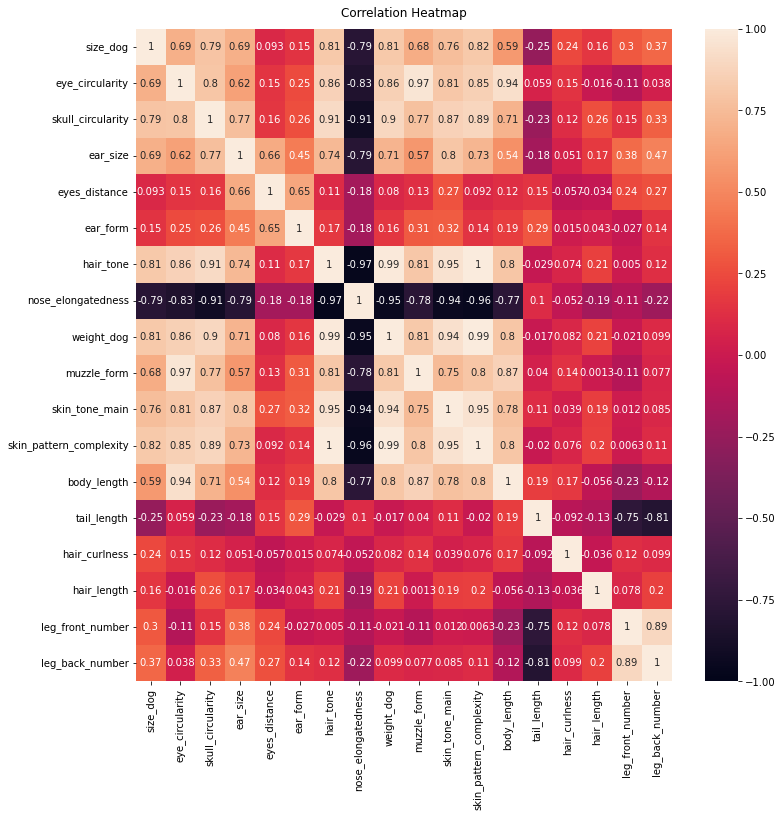

In [28]:
fig, ax = plt.subplots(figsize=(12,12)) 
heatmap = sns.heatmap(filledDog_df.corr(), vmin=-1, vmax=1, annot=True, ax=ax)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show

In [ ]:
sns.pairplot(data=filledDog_df, hue='breuni_class')